In [1]:
# Importar librerías aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Importar datos aquí
df = pd.read_csv('./data/largest_us_retailers.csv')
df.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


¿cuál empresa vendió más?

a) Escribe tu código dentro de celdas de código
Ejecuta el código que necesites para llegar al resultado que necesitas.

In [90]:
df_sorted = df.sort_values('Sales', ascending=0)
df_sorted.head(5)


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


b) Comparte insights con visualizaciones
Con ayuda de Matplotlib o Seaborn crea las gráficas que necesites para dar a conocer tu resultado e incluso enriquecerlo.

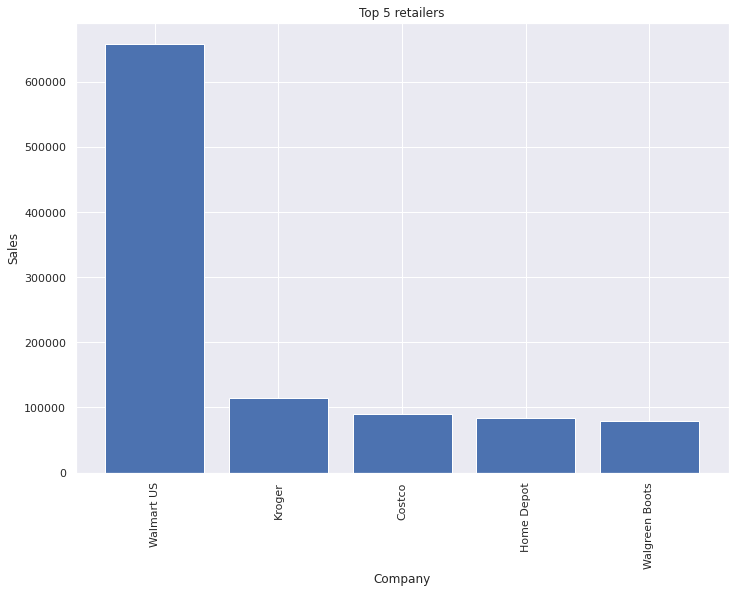

In [4]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
x = df_sorted['Company'][0:5]  # Aplicamos slicing como en una lista de Python.
y = df_sorted['Sales'][0:5]

plt.bar(x, y)
plt.title('Top 5 retailers')
plt.xlabel('Company')
plt.ylabel('Sales')
# Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.xticks(rotation='vertical')
plt.show()


c) Conclusiones
Debajo de tus resultados escribe conclusiones de lo que necesites resaltar de acuerdo a lo que observes. Utiliza esa intuición de los datos y dominio del negocio. Hazlo en una celda de texto en tu notebook.

La compañia que mas vendio de todas fue Wallmart US

Aspectos a evaluar:

- Responder la mayor cantidad de preguntas.
- Valor y veracidad de la información encontrada con las preguntas.
- Valor y veracidad de la información que entregues con los resultados de tus propias preguntas.
- Storytelling: visualizaciones fáciles de entender que muestren información valiosa, claridad y valor de tus conclusiones para cada hallazgo.

## Exploracion de datos

In [5]:
df.shape

(25, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             25 non-null     object 
 1   Sales               25 non-null     int64  
 2   Stores              23 non-null     float64
 3   Sales/Avg. Store    23 non-null     float64
 4   Store Count Growth  23 non-null     float64
 5   Category            24 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.3+ KB


<AxesSubplot:xlabel='Sales', ylabel='Count'>

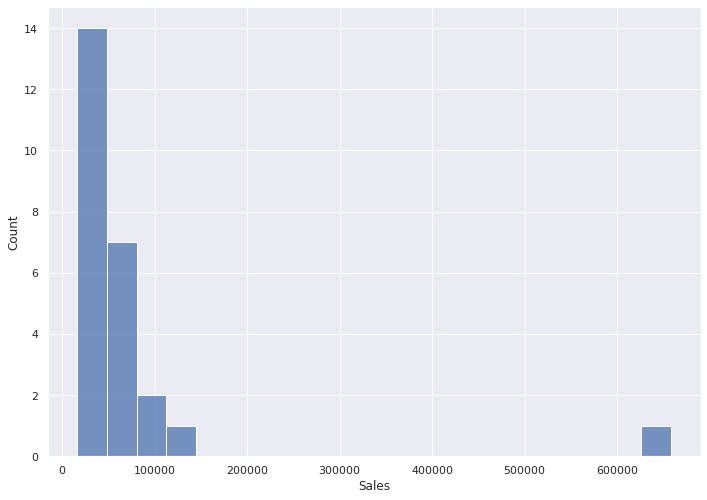

In [7]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.histplot(
    data=df['Sales'],
)


<AxesSubplot:xlabel='Sales', ylabel='Company'>

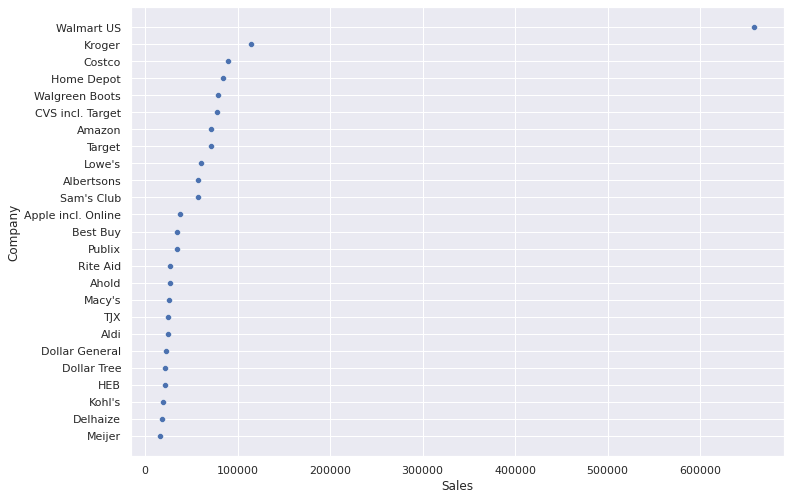

In [8]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.scatterplot(
  data=df,
  x='Sales',
  y='Company',
)


podemos observar que Wallmart es un Outlier estadistico ya que su valor es cientos de veces superior a los demás.

## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

#### Comportamiento de todo el set de datos

In [9]:
df.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


In [10]:
# Medidas de tendencia central en todo el dataframe
df.describe()


,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,25.000000,23.000000,23.000000,23.000000
mean,71063.080000,3466.565217,36.870966,0.040230
std,125405.727644,4038.708714,40.625277,0.068552
min,16592.000000,231.000000,1.563919,-0.059515
25%,24402.000000,1029.000000,11.263462,-0.001860
50%,34980.000000,1828.000000,25.997733,0.019520
75%,71687.000000,4242.000000,41.358955,0.078934
max,658119.000000,14250.000000,187.795620,0.255662


Text(0.5, 1.0, 'Ventas por Compañía')

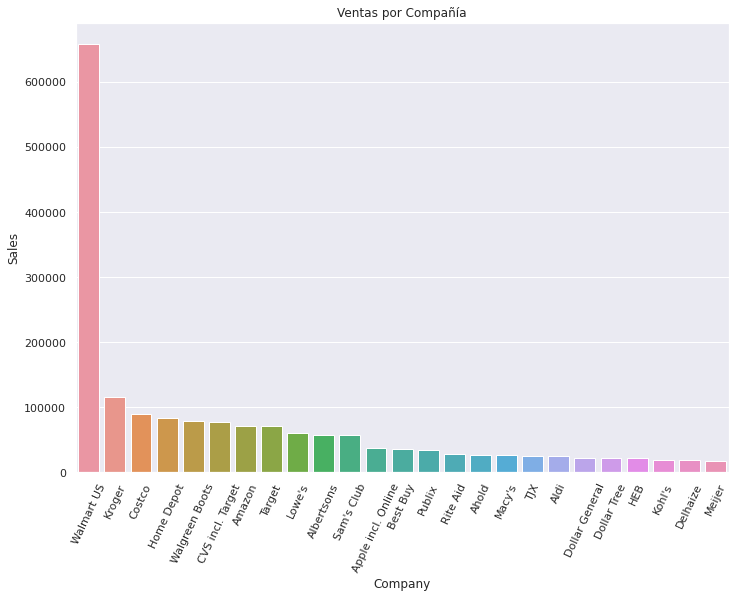

In [11]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
chart = sns.barplot(
    x=df['Company'],
    y=df['Sales'],
)

for item in chart.get_xticklabels():
    item.set_rotation(65)
chart.set_title('Ventas por Compañía')


Podemos ver que la compañía dominante es Wallmart US.

Text(0.5, 1.0, 'Histograma de todas las ventas')

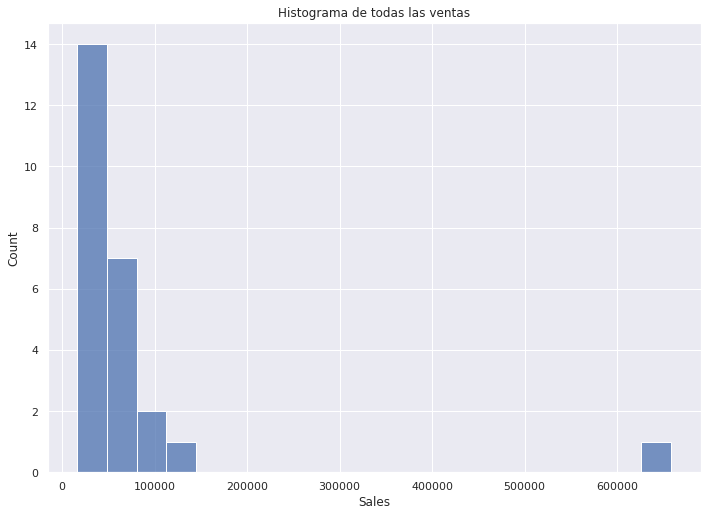

In [12]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
chart = sns.histplot(x=df['Sales'])
chart.set_title('Histograma de todas las ventas')



<AxesSubplot:xlabel='Sales', ylabel='Company'>

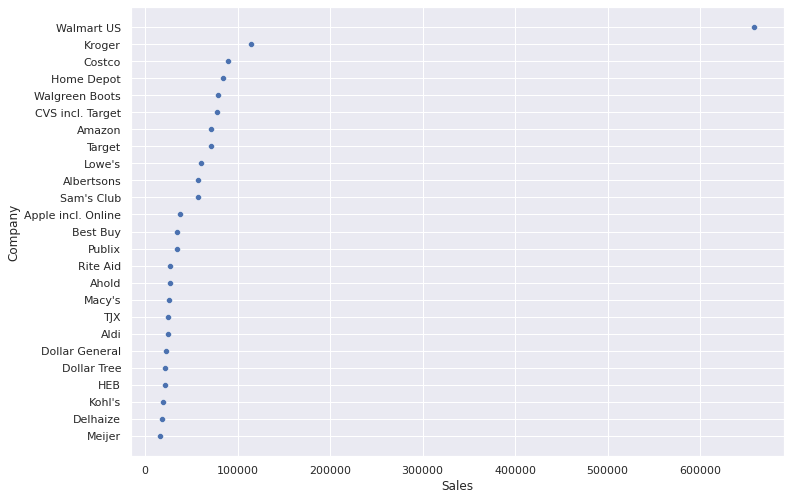

In [13]:
# Podemos ver cuales es la distribucion de datos por compañia
sns.scatterplot(
    data=df,
    x='Sales',
    y='Company',
)


En los scatter plots podemos ver la diferencia tan grande que existe entre los valores y Wallmart US la cual es una compañia que es Outlier ya que su valor es cientos de veces superior a los demás.

Text(0.5, 1.0, 'Diagrama de Caja todas las ventas')

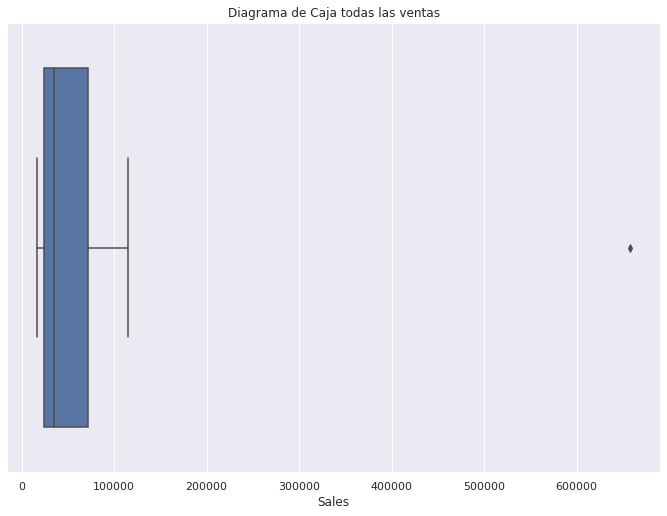

In [14]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
chart = sns.boxplot(x=df['Sales'])
chart.set_title('Diagrama de Caja todas las ventas')



Con el digrama de caja podemos ver como el valor de 658119 en ventas de Wallmart US es un Outlier estadistico, y ademas es **el unico Outlier de todo el dataset con respecto a las ventas.**

#### Comportamiento del set de datos sin Wallmart US

In [15]:
# Walmart US esta en la posicion 0
# df[1:]
# Filtro para mayor seguridad en caso de cambios al dataset
df_without_top = df.drop(df[df['Company'] == 'Walmart US'].index)
df_without_top.head()


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores


In [16]:
df_without_top.describe()


,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,24.000000,22.000000,22.000000,22.000000
mean,46602.416667,3416.227273,35.562840,0.041475
std,28317.981841,4126.358592,41.082510,0.069899
min,16592.000000,231.000000,1.563919,-0.059515
25%,23860.000000,959.000000,10.537195,-0.002790
50%,34694.000000,1800.000000,25.341845,0.026687
75%,71327.750000,3640.750000,38.598240,0.079281
max,115037.000000,14250.000000,187.795620,0.255662


<AxesSubplot:xlabel='Sales', ylabel='Company'>

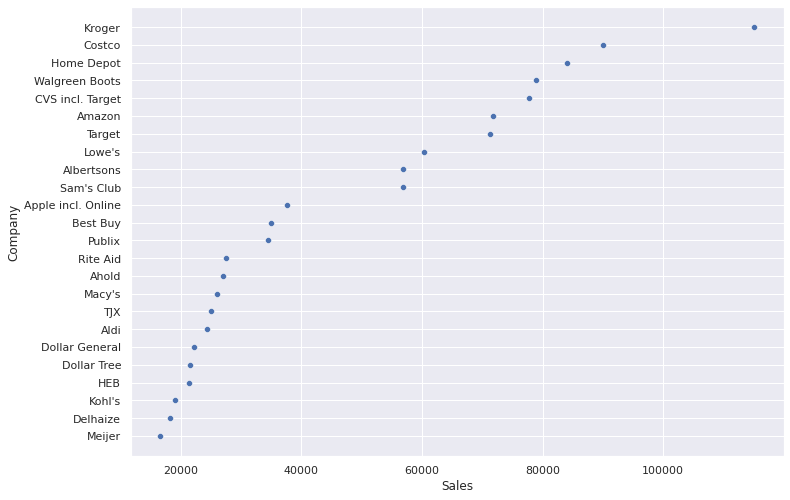

In [17]:
sns.scatterplot(
    data=df_without_top,
    x='Sales',
    y='Company',
)


Text(0.5, 1.0, 'Histograma de la mayoria las ventas')

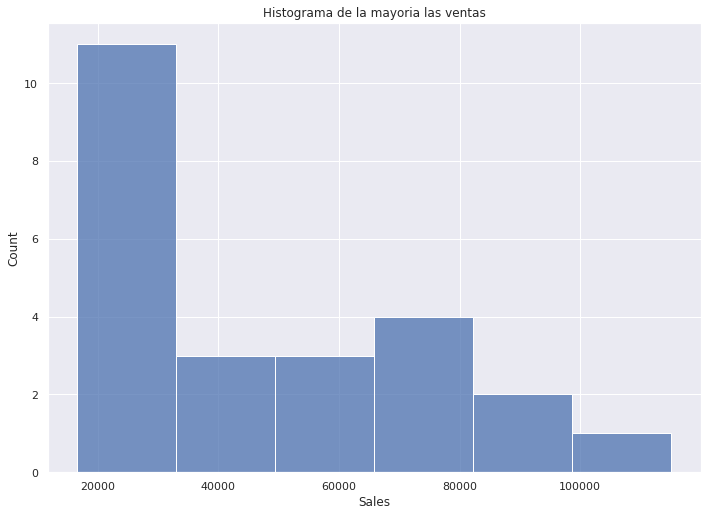

In [18]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
chart = sns.histplot(x=df_without_top['Sales'])
chart.set_title('Histograma de la mayoria las ventas')

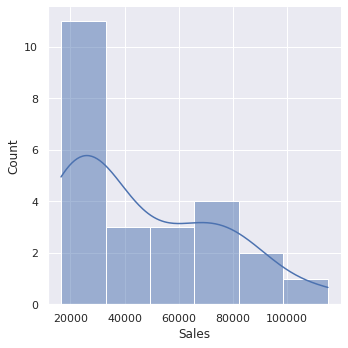

In [19]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
chart = sns.displot(x=df_without_top['Sales'], kde=True, rug=False)
# chart.set_title('Histograma de la mayoria las ventas')


Text(0.5, 1.0, 'Diagrama de Caja la moyoria de las ventas')

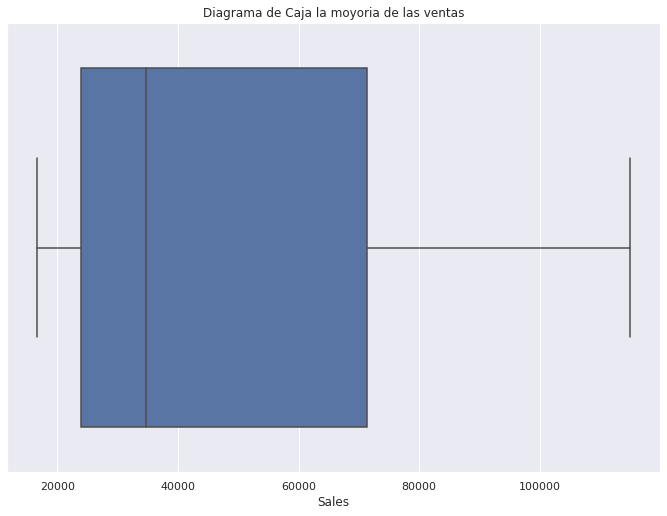

In [20]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
chart = sns.boxplot(x=df_without_top['Sales'])
chart.set_title('Diagrama de Caja la moyoria de las ventas')


Podemos ver que el promedio de las ventas considerando Wallmart US es de $71.063,08 mientras que el promedio de las ventas sin considerar Wallmart US es de $46.602,41, dandonos cuenta que Wallmart tiene un valor tan elevado que eleva el promedio $20.000 más de considerar solamente la mayoria de las compañias

#### Conclusiones

**¿Cuál es el promedio de ventas sin contar a la compañía dominante?**

El promedio de ventas de todas las compañias sin contar la compañia dominante es de $46.602,41 dolares.

Además Podemos ver que la distribucion de datos es asimetrica, sesgada asi la izquierda, en este sentido graficamente se puede observar como la mayoria de las compañias tienen un valor en ventas cercano a los ~$20.000 dolares, por lo cual cuando se considera el valor de ventas de **Wallmart US** el cual es un Outlier estadistico hace que el promedio en ventas suba hasta $71.063,08 el cual hace que este valor se aleje aun mas de la realidad de la mayoria de las compañias.

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

#### Que son la mayoría de las compañias?

Ya que tenemos una distribucion sesgada de datos, para poder decidir que representa estadisticamente la mayoria de las compañias usaremos el metodo de los Cuartiles y el Rango Intercuartil (IQR) para saber cuales son la mayoria de las compañias en cuanto a ventas.

In [21]:
# que tan asimetrica esta la distribucion
df['Sales'].skew()

4.615861489698804

In [22]:
Q1 = df['Sales'].quantile(q=0.25)
print(Q1)
Q3 = df['Sales'].quantile(q=0.75)
print(Q3)


24402.0
71687.0


In [23]:
# Rango Intercuartil
iqr = Q3 - Q1
iqr


47285.0

In [24]:
minlimit = Q1 - 1.5*iqr
print(f"Minimo: {minlimit}")
maxlimit = Q3 + 1.5*iqr
print(f"Maximo: {maxlimit}")


Minimo: -46525.5
Maximo: 142614.5


In [25]:
df_most_sales = df[(df['Sales'] > minlimit) & (df['Sales'] < maxlimit)]
df_most_sales

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs


In [26]:
df_most_sales.describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,24.000000,22.000000,22.000000,22.000000
mean,46602.416667,3416.227273,35.562840,0.041475
std,28317.981841,4126.358592,41.082510,0.069899
min,16592.000000,231.000000,1.563919,-0.059515
25%,23860.000000,959.000000,10.537195,-0.002790
50%,34694.000000,1800.000000,25.341845,0.026687
75%,71327.750000,3640.750000,38.598240,0.079281
max,115037.000000,14250.000000,187.795620,0.255662


Podemos observar que con el uso del rango intercuartil en las ventas la mayoria de las compañias es efectivamente contemplado por todas las compañias exceptuando **Wallmar US**

In [27]:
df_most_sales.dtypes

Company                object
Sales                   int64
Stores                float64
Sales/Avg. Store      float64
Store Count Growth    float64
Category               object
dtype: object

In [28]:
df_most_sales['Sales'].describe()

count        24.000000
mean      46602.416667
std       28317.981841
min       16592.000000
25%       23860.000000
50%       34694.000000
75%       71327.750000
max      115037.000000
Name: Sales, dtype: float64

In [29]:
df_most_sales['Sales'].sum()

1118458

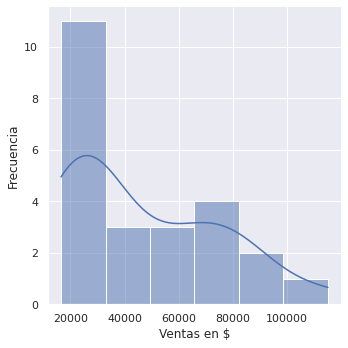

In [30]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
chart = sns.displot(x=df_most_sales['Sales'], kde=True, rug=False)
chart.set_xlabels('Ventas en $')
chart.set_ylabels('Frecuencia')


In [31]:
df_most_sales['Sales'].median()

34694.0

In [32]:
df_most_sales['Sales'].mode()


0      16592
1      18201
2      19060
3      21384
4      21464
5      22234
6      24402
7      25012
8      26028
9      26903
10     27486
11     34408
12     34980
13     37664
14     56828
15     56829
16     60311
17     71208
18     71687
19     77792
20     78924
21     83976
22     90048
23    115037
dtype: int64

#### Conclusiones
**¿Cuánto dinero en ventas generó la mayoría de las compañías?**

En la muestra de datos que trabajamos **la mayoría de las compañias generaron un valor en ventas total de $1.118.458 dolares.**

En vista de que la distribucion es sesgada la mediana en ventas que es de $34.694,0 dolares representa un valor mas cercano a la realidad, que el promedio el cual es de $46.602,41 dolares.

**Por lo cual la mayoria de las compañias generaron en ventas un valor cercano a $34.694,0 dolares**

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

<AxesSubplot:xlabel='Stores', ylabel='Count'>

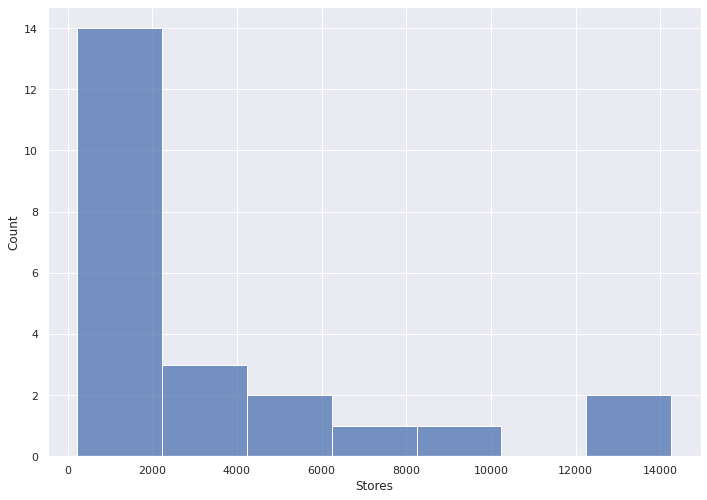

In [33]:
sns.histplot(x=df['Stores'])

<AxesSubplot:xlabel='Stores', ylabel='Company'>

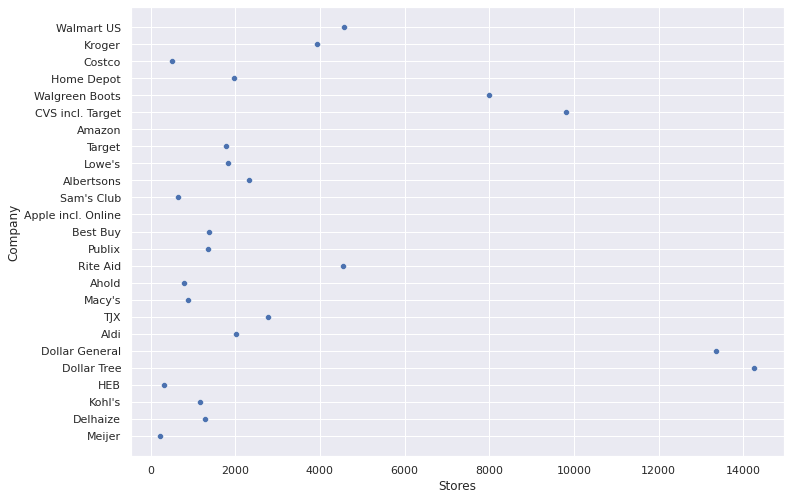

In [34]:
# Podemos ver cuales es la distribucion de datos por compañia
sns.scatterplot(
    data=df,
    x='Stores',
    y='Company',
)


Podemos observar que en todos los datos a lo hora de la compañia vemos que existe un distribucion totalmente distinta a la de las ventas

Text(0.5, 1.0, 'Diagrama de Caja de las Tiendas')

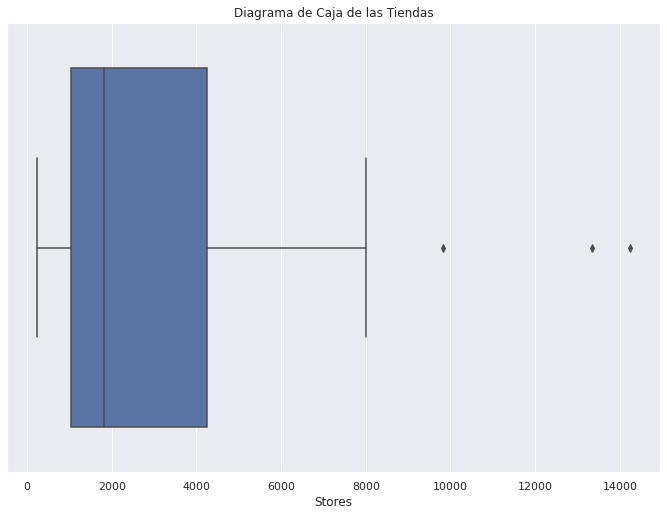

In [35]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
chart = sns.boxplot(x=df['Stores'])
chart.set_title('Diagrama de Caja de las Tiendas')


Podemos ver exiten 3 datos Atipicos en la distribucion de la cantidad de tiendas

In [36]:
def most_data_dataframe(_df, column):
  """
  Metodo para obtener la mayoria de datos sin considerar los outliers dado
  un dataframe y la columna de la cual se quiere
  """
  q1 = _df[column].quantile(q=0.25)
  q3 = _df[column].quantile(q=0.75)
  print(f"q1: {q1}")
  print(f"q3: {q3}")

  # Rango Intercuartil
  iqr = q3 - q1
  print(f"Rango Intercuartil: {iqr}")

  minlimit = q1 - 1.5*iqr
  print(f"Minimo: {minlimit}")
  maxlimit = q3 + 1.5*iqr
  print(f"Maximo: {maxlimit}")

  response_df = _df[(_df[column] > minlimit) & (_df[column] < maxlimit)]

  return response_df


In [37]:
df_most_stores = most_data_dataframe(df, 'Stores')
# df_most_stores

q1: 1029.0
q3: 4242.0
Rango Intercuartil: 3213.0
Minimo: -3790.5
Maximo: 9061.5


In [38]:
df_most_stores.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


<AxesSubplot:xlabel='Stores', ylabel='Count'>

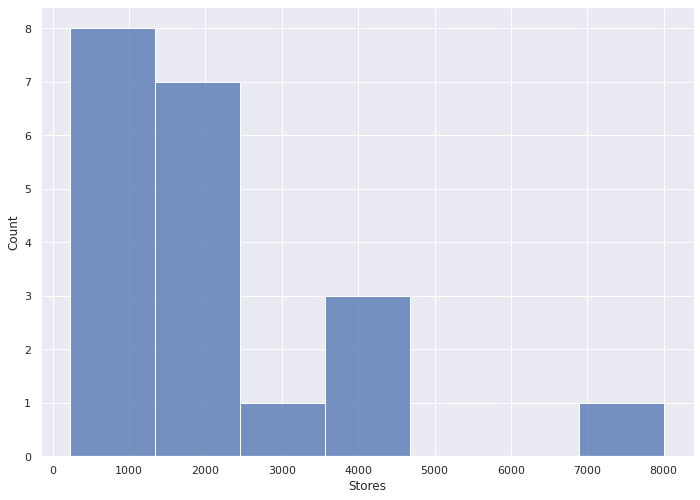

In [39]:
sns.histplot(x=df_most_stores['Stores'])


<AxesSubplot:xlabel='Stores', ylabel='Company'>

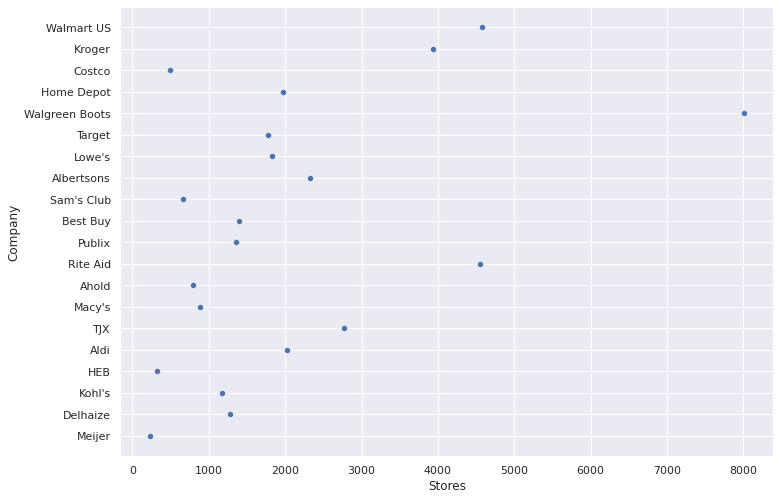

In [40]:
# Podemos ver cuales es la distribucion de datos por compañia
sns.scatterplot(
    data=df_most_stores,
    x='Stores',
    y='Company',
)


Text(0.5, 1.0, 'Diagrama de Caja la moyoria de las Tiendas')

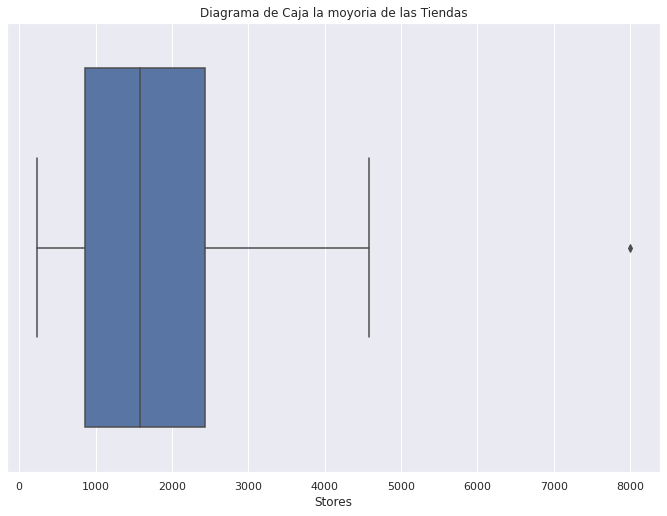

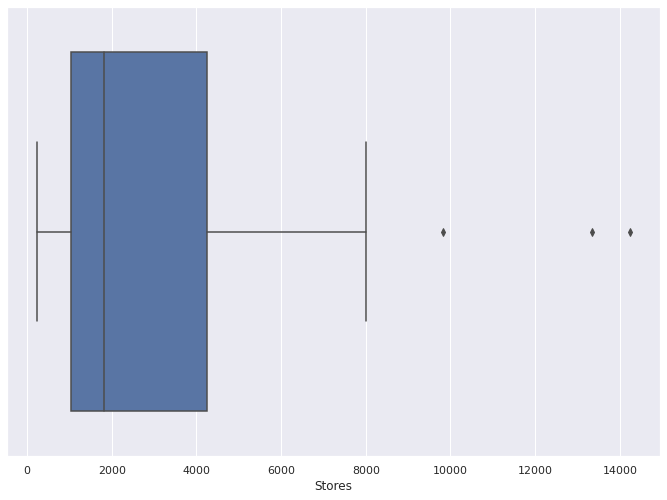

In [41]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
chart = sns.boxplot(x=df_most_stores['Stores'])
plt.figure()
sns.boxplot(x=df['Stores'])
chart.set_title('Diagrama de Caja la moyoria de las Tiendas')


Podemos observar que aunque el nuevo diagrama de Caja muestra Outliers en realidad se removieron todos los Outliers de la distribucion de datos original.

In [42]:
df_most_stores.describe()


,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,20.000000,20.000000,20.000000,20.000000
mean,77286.800000,2115.900000,41.793673,0.022879
std,139672.193072,1893.448313,41.396136,0.046399
min,16592.000000,231.000000,6.025649,-0.059515
25%,24859.500000,865.250000,15.710976,-0.005304
50%,34694.000000,1580.500000,30.236977,0.015885
75%,73137.000000,2437.000000,48.464340,0.057118
max,658119.000000,8002.000000,187.795620,0.112273


In [43]:
df_most_stores['Stores'].describe()


count      20.000000
mean     2115.900000
std      1893.448313
min       231.000000
25%       865.250000
50%      1580.500000
75%      2437.000000
max      8002.000000
Name: Stores, dtype: float64

In [44]:
df_most_stores['Stores'].median()


1580.5

#### Conclusiones

**¿Cuántas tiendas tiene la mayoría de las compañías?**

Tras el analisis y limpieza de datos la mayoria de las compañias en el dataset tienen una cantidad de tiendas cercano a las 1580 tiendas.

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

In [45]:
df_clean = df.fillna(0)
df_clean


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,0.0,0.000000,0.000000,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


Rellenamos con 0 los datos faltantes ya que hay compañias que no tienen datos de tiendas. Lo cual es llevado a 0 para poder realizar un analisis efectivo de nuestra data.

Text(0.5, 1.0, 'Scatter plot de las variables Store y Sales')

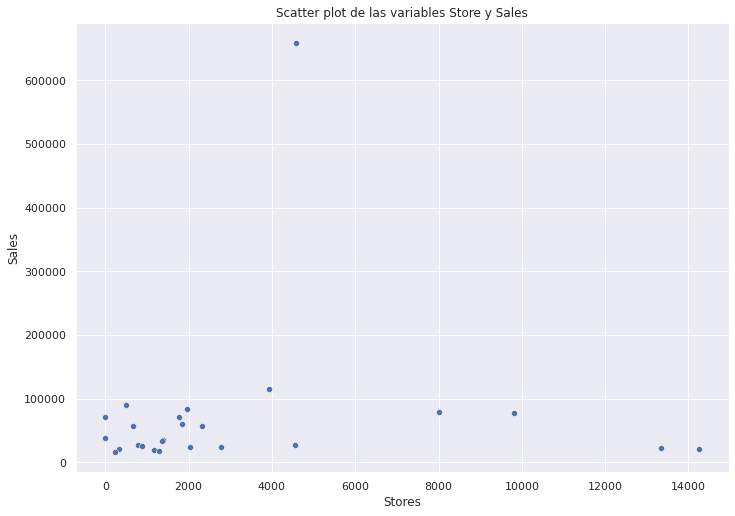

In [46]:
chart = sns.scatterplot(
    data=df_clean,
    x='Stores',
    y='Sales',
)
chart.set_title('Scatter plot de las variables Store y Sales')


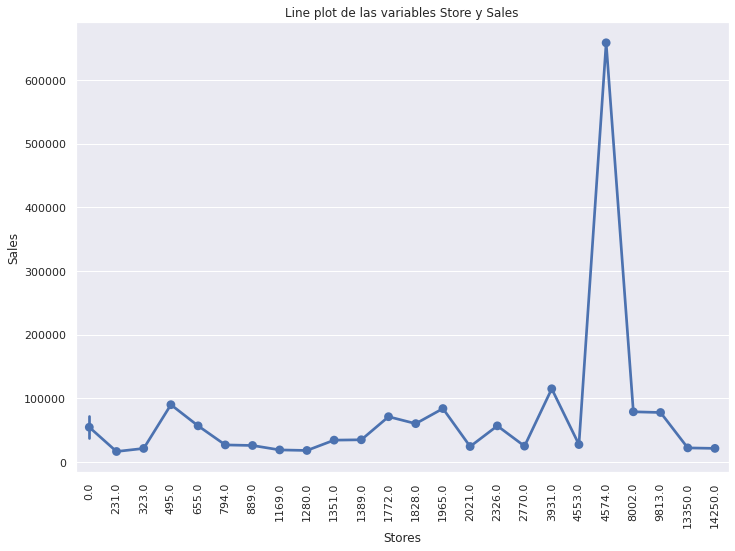

In [47]:
chart=sns.pointplot(
  data=df_clean,
  x='Stores',
  y='Sales',
)
chart.set_title('Line plot de las variables Store y Sales')

# rotate x ticks labels
for tick in chart.get_xticklabels():
  tick.set_rotation(90)


In [48]:
df_clean['Sales'].corr(df_clean['Stores'])


0.07081729398024916

In [49]:
# df_clean = df_clean.set_index('Company')


<AxesSubplot:>

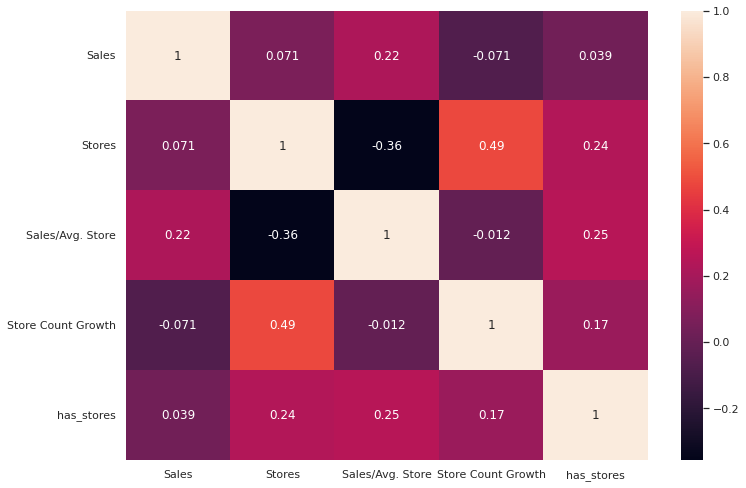

In [200]:
sns.heatmap(df_clean.corr(), annot=True)


#### Conclusiones

**4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?**
Como podemos ver en las graficas que no existe una correlacion entre la cantidad de tiendas y el valor en ventas, esto es comprobado al calcular la correlacion entre estas dos columnas de datos con una corrrelacion de 0.07 la cual es extremadamente baja, por lo cual podemo decir que **NO hay relacion entre la cantidad de tiendas y la cantidad de ventas, y tener mas tiendas no implica tener mas dinero en ventas**

### 5. ¿Cuál es el rango que existe entre las ventas?

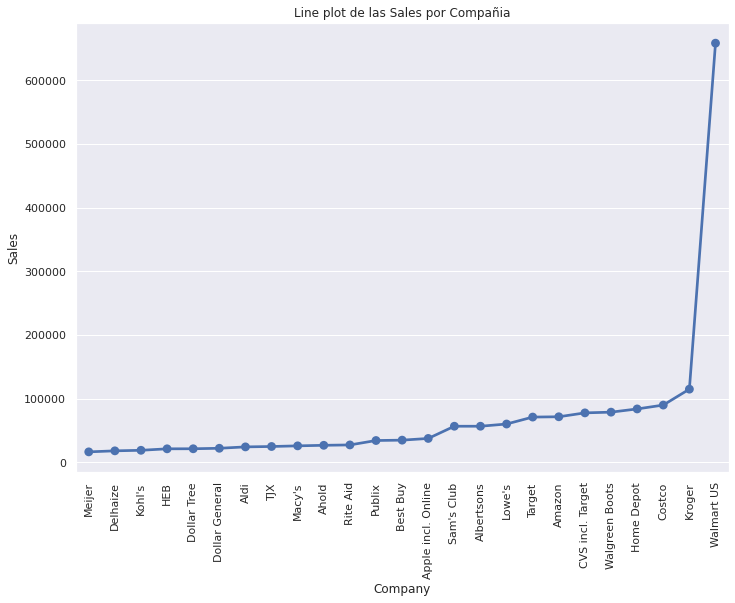

In [51]:
chart = sns.pointplot(
    data=df_clean.sort_values(by='Sales'),
    x='Company',
    y='Sales',
)
chart.set_title('Line plot de las Sales por Compañia')

# rotate x ticks labels
for tick in chart.get_xticklabels():
  tick.set_rotation(90)


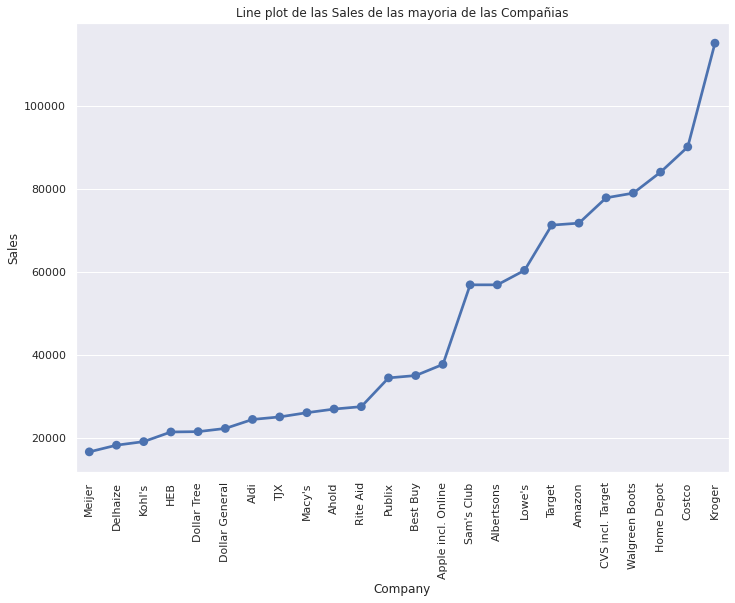

In [52]:
chart = sns.pointplot(
    data=df_most_sales.sort_values(by='Sales'),
    x='Company',
    y='Sales',
)
chart.set_title('Line plot de las Sales de las mayoria de las Compañias')

# rotate x ticks labels
for tick in chart.get_xticklabels():
  tick.set_rotation(90)


In [53]:
df_clean.describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,25.000000,25.000000,25.000000,25.000000
mean,71063.080000,3189.240000,33.921289,0.037012
std,125405.727644,3984.120117,40.213239,0.066572
min,16592.000000,0.000000,0.000000,-0.059515
25%,24402.000000,794.000000,9.369545,0.000000
50%,34980.000000,1772.000000,24.685956,0.018927
75%,71687.000000,3931.000000,39.982033,0.078241
max,658119.000000,14250.000000,187.795620,0.255662


In [54]:
range_df = df_clean['Sales'].max() - df_clean['Sales'].min()
range_df


641527

In [55]:
df_most_sales.describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,24.000000,22.000000,22.000000,22.000000
mean,46602.416667,3416.227273,35.562840,0.041475
std,28317.981841,4126.358592,41.082510,0.069899
min,16592.000000,231.000000,1.563919,-0.059515
25%,23860.000000,959.000000,10.537195,-0.002790
50%,34694.000000,1800.000000,25.341845,0.026687
75%,71327.750000,3640.750000,38.598240,0.079281
max,115037.000000,14250.000000,187.795620,0.255662


In [56]:
range_df2 = df_most_sales['Sales'].max() - df_most_sales['Sales'].min()
range_df2



98445

#### Conclusiones

**5. ¿Cuál es el rango que existe entre las ventas?**
De todas las compañias, el valor en ventas tiene **un rango de $641.527,00 dolares**  con un valor en ventas **minimo de $16.592,00 dolares** y un valor en ventas **maximo de $658.119,00 dolares**

Si tomamos en cuenta solo la mayoria de las compañias tendremos un rango **$98.445 dolares**

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

In [57]:
df_clean.sort_values(by='Sales', ascending=False).head(5)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


In [58]:
df_clean.sort_values(by='Stores', ascending=False).head(5)


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters


In [59]:
df_clean.sort_values(by=['Sales','Stores'], ascending=(False, False)).head(5)


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


Text(0.5, 1.0, 'Bubble plot de las Compañias respecto a Sales y el tamaño es respecto a la cantidad de tiendas')

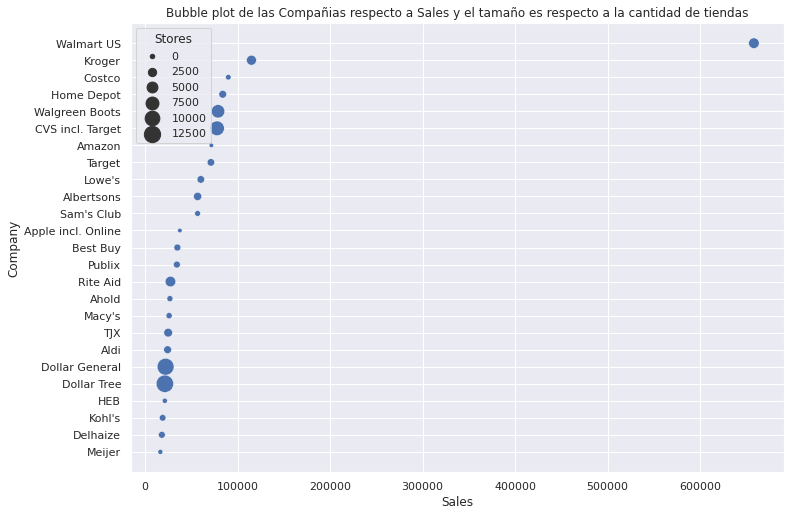

In [60]:
chart = sns.scatterplot(
  data=df_clean,
  x='Sales',
  y='Company',
  size='Stores',
  sizes=(20, 300),
)
chart.set_title('Bubble plot de las Compañias respecto a Sales y el tamaño es respecto a la cantidad de tiendas')

Text(0.5, 1.0, 'Bubble plot de las Compañias respecto a Stores y el tamaño es respecto a la cantidad de ventas')

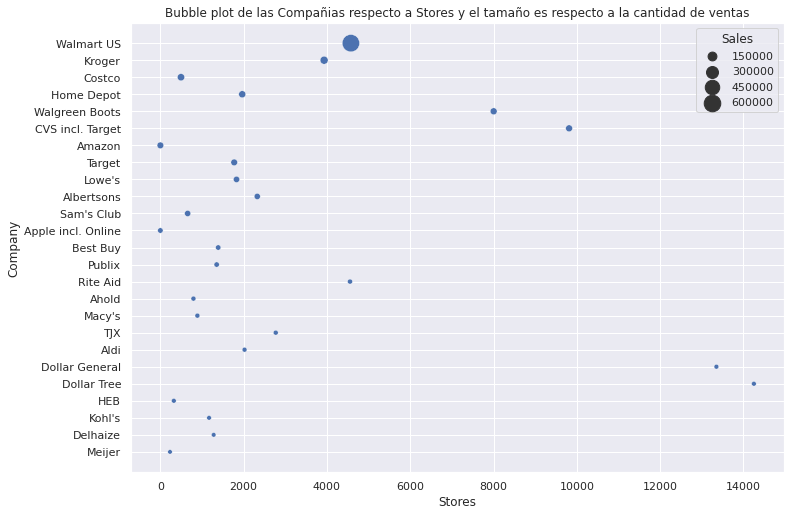

In [61]:
chart = sns.scatterplot(
    data=df_clean,
    x='Stores',
    y='Company',
    size='Sales',
    sizes=(20, 300),
)
chart.set_title('Bubble plot de las Compañias respecto a Stores y el tamaño es respecto a la cantidad de ventas')

In [62]:
top_5_company_by_stores = df_clean.sort_values(by='Stores', ascending=False).head(5).index
top_5_company_by_stores.values


array([20, 19,  5,  4,  0])

In [63]:
top_5_sales = df_clean.sort_values(by='Sales', ascending=False).head(5)

In [64]:
top_5_sales['company_name'] = top_5_sales.index
store_sale_filter = top_5_sales['company_name'].apply(
    lambda x: x in top_5_company_by_stores.values)
store_sale_filter


0     True
1    False
2    False
3    False
4     True
Name: company_name, dtype: bool

In [65]:
top_5_sales[store_sale_filter]


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,company_name
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,0
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,4


#### Conclusiones

**6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?**

Las 5 compañias con mas ventas son
1. 'Dollar Tree'
2. 'Dollar General'
3. 'CVS incl. Target'
4. 'Walgreen Boots'
5. 'Walmart US'.

De las cuales solamente 'Walgreen Boots' y 'Walmart US' son partes del top 5 de las compañias con mas ventas.

Siendo 'Walmart US' la compañia numero 1 con mas ventas de todas y 'Walgreen Boots' la 5ta compañia con mas ventas de todas.

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

In [66]:
# limpiar la data denuevo para darle nombre a la fila sin categoria
df_clean = df
df_clean['Category'] = df_clean['Category'].fillna('N/A')
df_clean['Store Count Growth'] = df_clean['Store Count Growth'].fillna(0)
df_clean['Sales/Avg. Store'] = df_clean['Sales/Avg. Store'].fillna(0)
df_clean['Stores'] = df_clean['Stores'].fillna(0)
df_clean.head()



,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


In [132]:
# Warehouse Clubs y Warehouse Club son dos categorias distintas que deberian unirse
df_clean['Category'].unique()


array(['Dollar Stores', 'Drug Stores', 'Supercenters', 'Grocery',
       'Apparel', 'Home Improvement', 'Electronics', 'Department Stores',
       'Warehouse Clubs', 'Electronic/Mail Order', 'N/A'], dtype=object)

In [131]:
df_clean['Category'] = df_clean['Category'].replace('Warehouse Club', 'Warehouse Clubs')


In [133]:
# agrupamos los datos por categoria
df_group_category = df_clean.groupby('Category')
df_group_category.describe()


Sales                                                   \
                      count           mean            std      min       25%   
Category                                                                       
Apparel                 1.0   25012.000000            NaN  25012.0  25012.00   
Department Stores       2.0   22544.000000    4927.120051  19060.0  20802.00   
Dollar Stores           2.0   21849.000000     544.472222  21464.0  21656.50   
Drug Stores             3.0   61400.666667   29376.416006  27486.0  52639.00   
Electronic/Mail Order   1.0   71687.000000            NaN  71687.0  71687.00   
Electronics             1.0   34980.000000            NaN  34980.0  34980.00   
Grocery                 7.0   42452.000000   34495.245605  18201.0  22893.00   
Home Improvement        2.0   72143.500000   16733.681977  60311.0  66227.25   
N/A                     1.0   37664.000000            NaN  37664.0  37664.00   
Supercenters            3.0  248639.666667  355669.397312  16592.0  43900.00   
Warehouse Clubs         2.0   73438.000000   23490.087271  56828.0  65133.00   

                                                    Stores                ...  \
                           50%        75%       max  count          mean  ...   
Category                                                                  ...   
Apparel                25012.0   25012.00   25012.0    1.0   2770.000000  ...   
Department Stores      22544.0   24286.00   26028.0    2.0   1029.000000  ...   
Dollar Stores          21849.0   22041.50   22234.0    2.0  13800.000000  ...   
Drug Stores            77792.0   78358.00   78924.0    3.0   7456.000000  ...   
Electronic/Mail Order  71687.0   71687.00   71687.0    1.0      0.000000  ...   
Electronics            34980.0   34980.00   34980.0    1.0   1389.000000  ...   
Grocery                26903.0   45618.50  115037.0    7.0   1718.000000  ...   
Home Improvement       72143.5   78059.75   83976.0    2.0   1896.500000  ...   
N/A                    37664.0   37664.00   37664.0    1.0      0.000000  ...   
Supercenters           71208.0  364663.50  658119.0    3.0   2192.333333  ...   
Warehouse Clubs        73438.0   81743.00   90048.0    2.0    575.000000  ...   

                      Sales/Avg. Store             Store Count Growth  \
                                   75%         max              count   
Category                                                                
Apparel                       9.369545    9.369545                1.0   
Department Stores            26.919953   30.442105                2.0   
Dollar Stores                 1.717643    1.768885                2.0   
Drug Stores                   9.318443    9.810927                3.0   
Electronic/Mail Order         0.000000    0.000000                1.0   
Electronics                  24.685956   24.685956                1.0   
Grocery                      32.239356   66.825000                7.0   
Home Improvement             40.379856   42.735878                2.0   
N/A                           0.000000    0.000000                1.0   
Supercenters                 70.194232   74.738739                3.0   
Warehouse Clubs             162.670064  187.795620                2.0   

                                                                         \
                           mean       std       min       25%       50%   
Category                                                                  
Apparel                0.078241       NaN  0.078241  0.078241  0.078241   
Department Stores      0.044425  0.054307  0.006024  0.025225  0.044425   
Dollar Stores          0.106019  0.037324  0.079627  0.092823  0.106019   
Drug Stores            0.080477  0.151753 -0.010511 -0.007115 -0.003720   
Electronic/Mail Order  0.000000       NaN  0.000000  0.000000  0.000000   
Electronics           -0.038754       NaN -0.038754 -0.038754 -0.038754   
Grocery                0.022499  0.058853 -0.059515 -0.012722  0.033

In [134]:
# la suma de todas las ventas por categoria
chart_data = df_group_category['Sales'].sum()
chart_data
dict_data = dict(chart_data)


In [135]:
# ordenamos el diccionario para poder graficarlo mejor
dict_data = {k: v for k, v in sorted(dict_data.items(), key=lambda item: item[1])}


Text(0.5, 1.0, 'Ventas por Categoria')

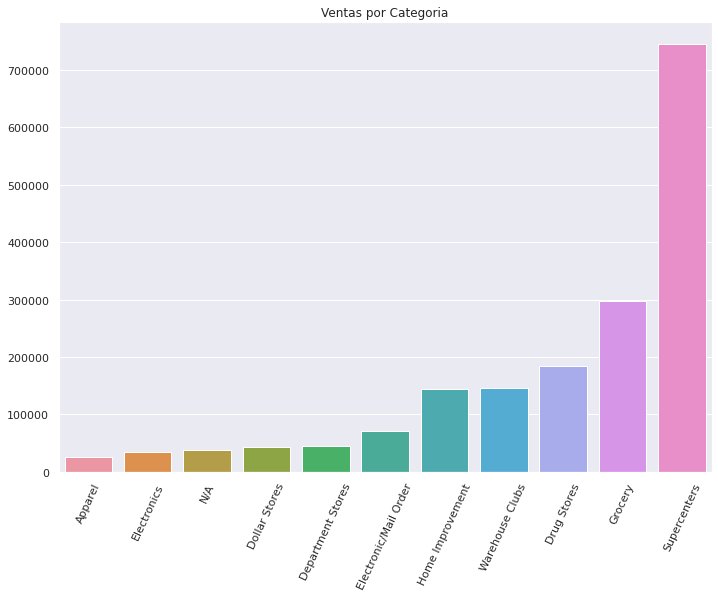

In [136]:
chart = sns.barplot(
    x=list(dict_data.keys()),
    y=list(dict_data.values()),
)

for item in chart.get_xticklabels():
    item.set_rotation(65)
chart.set_title('Ventas por Categoria')

In [137]:
df_group_category['Sales'].sum()

Category
Apparel                   25012
Department Stores         45088
Dollar Stores             43698
Drug Stores              184202
Electronic/Mail Order     71687
Electronics               34980
Grocery                  297164
Home Improvement         144287
N/A                       37664
Supercenters             745919
Warehouse Clubs          146876
Name: Sales, dtype: int64

In [138]:
df_group_category['Sales'].sum().max()


745919

#### Conclusiones
**7. ¿Qué categoría de compañía generó más ventas?**
Tras el analisis de los datos y la graficacion de los mismos podemos ver que al sumar el valor de todas las ventas por categoria, **la categoria con el mayor valor en ventas de todas es "Supercenters"** con un total de valor en **ventas de $745.919,00 dolares.**

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

In [73]:
df_sorted = df_clean.sort_values(by=['Stores', 'Sales'], ascending=(False, False))
# df_sorted

In [74]:
df_stores_sales = df_sorted.drop(df_sorted[df_sorted['Stores'] == 0].index)

In [75]:
df_stores_sales['SalesProportionStores'] = df_stores_sales['Sales'] / df_stores_sales['Stores']
df_stores_sales = df_stores_sales.sort_values(
    by='SalesProportionStores', ascending=True)
df_stores_sales


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,SalesProportionStores
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores,1.506246
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores,1.665468
14,Rite Aid,27486,4553.0,6.025649,-0.003720,Drug Stores,6.036899
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores,7.927443
17,TJX,25012,2770.0,9.369545,0.078241,Apparel,9.029603
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,9.863034
18,Aldi,24402,2021.0,12.715998,0.112273,Grocery,12.074221
23,Delhaize,18201,1280.0,13.783415,-0.059515,Grocery,14.219531
22,Kohl's,19060,1169.0,16.353496,0.006024,Department Stores,16.304534
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery,24.432072


Text(0.5, 1.0, 'Proporcion de Ventas respecto a cantidad de Tiendas')

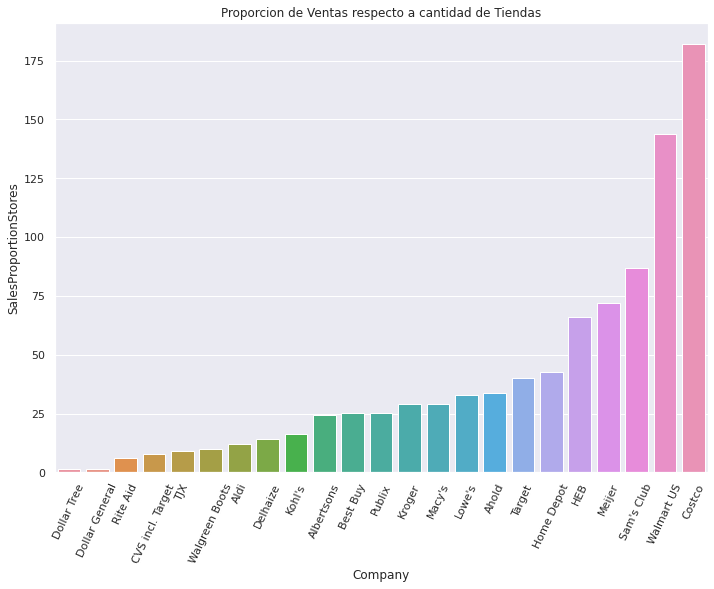

In [76]:
chart = sns.barplot(
    x=df_stores_sales['Company'],
    y=df_stores_sales['SalesProportionStores'],
)

for item in chart.get_xticklabels():
    item.set_rotation(65)
chart.set_title('Proporcion de Ventas respecto a cantidad de Tiendas')


#### Conclusiones
**8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?**
Tras calcular y graficar la proporcion de Ventas con respecto a la cantidad de compañias disponibles, podemos ver que **Cotsco** es la compañia con tienda Fisica que genera la mayor cantidad de ingresos en relacion a la cantidad de tiendas fisicas que posee.


### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

In [77]:
df_clean[df_clean['Stores'] == 0]


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
6,Amazon,71687,0.0,0.0,0.0,Electronic/Mail Order
11,Apple incl. Online,37664,0.0,0.0,0.0,N/A


In [78]:
df_clean = df_clean.sort_values(by='Sales', ascending=False)
df_clean['has_stores'] = df_clean['Stores'] > 0
df_clean.head(12)


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,has_stores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,True
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,True
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,True
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,True
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,True
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores,True
6,Amazon,71687,0.0,0.000000,0.000000,Electronic/Mail Order,False
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters,True
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement,True
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery,True


Text(0.5, 1.0, 'Ventas de Compañias y Compañias sin Tiendas')

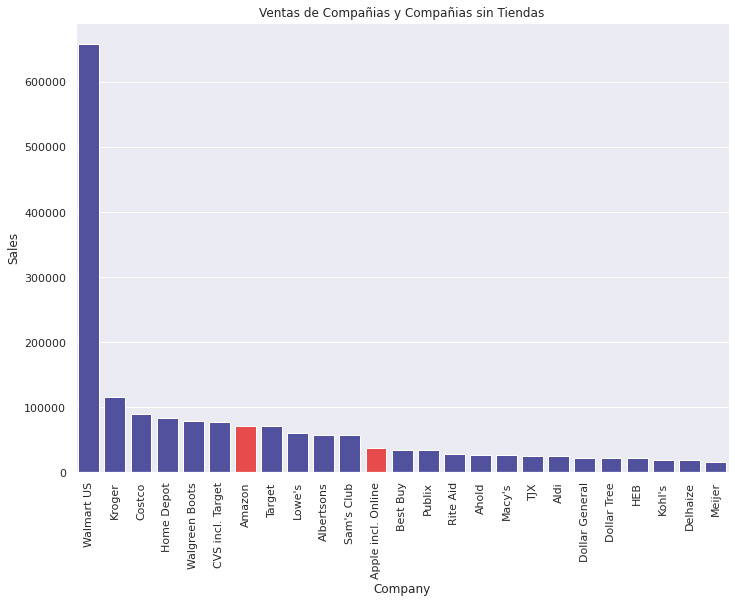

In [79]:
colors = ['#F33' if value else "#44A" for value in df_clean['Stores'] == 0]

chart = sns.barplot(
    x=df_clean['Company'],
    y=df_clean['Sales'],
    palette=sns.color_palette(colors),
)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_title('Ventas de Compañias y Compañias sin Tiendas')


#### Conclusiones

**9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?**

Las compañias que vendan exclusivamente online son: **Amazon y Apple incl. Online.**

Y su valor ventas si se destacan con otras compañias que si tienen tiendas, **ya que Amazon es la 7ma compañia** con mas ventas y **Apple la 12va con mas ventas.**

## III. Tus propias preguntas

### 10. Sin tomar en cuenta la compañia dominante en ventas,¿cual categoria genera mayor valor en ventas?, y de las compañias que conforman este grupo, ¿alguna se encuentra en el top de ventas ?

In [139]:
# agrupamos los datos por categoria
df_group_category = df_most_sales.groupby('Category')
df_group_category.describe()


Sales                                                 \
                      count          mean           std      min       25%   
Category                                                                     
Apparel                 1.0  25012.000000           NaN  25012.0  25012.00   
Department Stores       2.0  22544.000000   4927.120051  19060.0  20802.00   
Dollar Stores           2.0  21849.000000    544.472222  21464.0  21656.50   
Drug Stores             3.0  61400.666667  29376.416006  27486.0  52639.00   
Electronic/Mail Order   1.0  71687.000000           NaN  71687.0  71687.00   
Electronics             1.0  34980.000000           NaN  34980.0  34980.00   
Grocery                 7.0  42452.000000  34495.245605  18201.0  22893.00   
Home Improvement        2.0  72143.500000  16733.681977  60311.0  66227.25   
Supercenters            2.0  43900.000000  38619.343961  16592.0  30246.00   
Warehouse Club          1.0  90048.000000           NaN  90048.0  90048.00   
Warehouse Clubs         1.0  56828.000000           NaN  56828.0  56828.00   

                                                   Stores           ...  \
                           50%       75%       max  count     mean  ...   
Category                                                            ...   
Apparel                25012.0  25012.00   25012.0    1.0   2770.0  ...   
Department Stores      22544.0  24286.00   26028.0    2.0   1029.0  ...   
Dollar Stores          21849.0  22041.50   22234.0    2.0  13800.0  ...   
Drug Stores            77792.0  78358.00   78924.0    3.0   7456.0  ...   
Electronic/Mail Order  71687.0  71687.00   71687.0    0.0      NaN  ...   
Electronics            34980.0  34980.00   34980.0    1.0   1389.0  ...   
Grocery                26903.0  45618.50  115037.0    7.0   1718.0  ...   
Home Improvement       72143.5  78059.75   83976.0    2.0   1896.5  ...   
Supercenters           43900.0  57554.00   71208.0    2.0   1001.5  ...   
Warehouse Club         90048.0  90048.00   90048.0    1.0    495.0  ...   
Warehouse Clubs        56828.0  56828.00   56828.0    1.0    655.0  ...   

                      Sales/Avg. Store             Store Count Growth  \
                                   75%         max              count   
Category                                                                
Apparel                       9.369545    9.369545                1.0   
Department Stores            26.919953   30.442105                2.0   
Dollar Stores                 1.717643    1.768885                2.0   
Drug Stores                   9.318443    9.810927                3.0   
Electronic/Mail Order              NaN         NaN                0.0   
Electronics                  24.685956   24.685956                1.0   
Grocery                      32.239356   66.825000                7.0   
Home Improvement             40.379856   42.735878                2.0   
Supercenters                 66.049562   74.738739                2.0   
Warehouse Club              187.795620  187.795620                1.0   
Warehouse Clubs              87.293395   87.293395                1.0   

                                                                         \
                           mean       std       min       25%       50%   
Category                                                                  
Apparel                0.078241       NaN  0.078241  0.078241  0.078241   
Department Stores      0.044425  0.054307  0.006024  0.025225  0.044425   
Dollar Stores          0.106019  0.037324  0.079627  0.092823  0.106019   
Drug Stores            0.080477  0.151753 -0.010511 -0.007115 -0.003720   
Electronic/Mail Order       NaN       NaN       NaN       NaN       NaN   
Electronics           -0.038754       NaN -0.038754 -0.038754 -0.038754   
Grocery                0.022499  0.058853 -0.059515 -0.012722  0.033854   
Home Improvement       0.009760  0.013803  0.000000  0.004880  0.009760   
Supercenters           0.03722

In [141]:
df_most_sales['Category'] = df_most_sales['Category'].replace('Warehouse Club', 'Warehouse Clubs')


/tmp/ipykernel_8039/3794339465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_most_sales['Category'] = df_most_sales['Category'].replace('Warehouse Club', 'Warehouse Clubs')


In [144]:
# df_most_sales['Category'].unique()


Text(0.5, 1.0, 'Ventas por Categoria sin Wallmart')

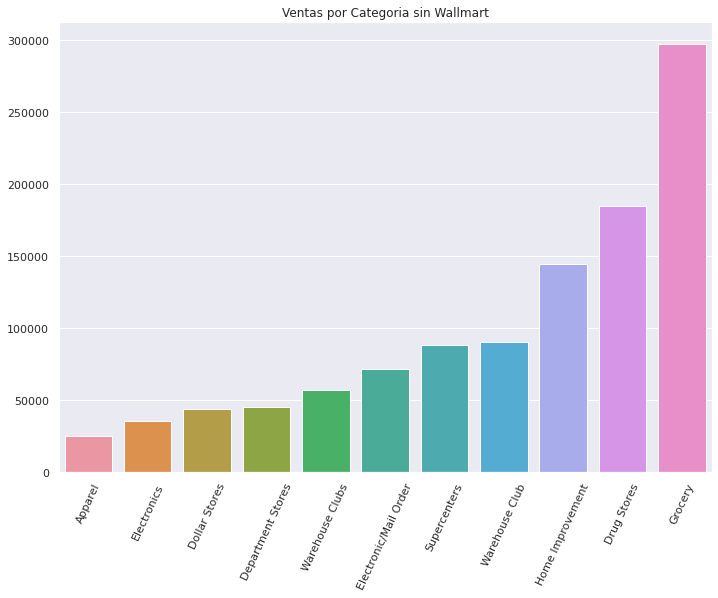

In [145]:
# la suma de todas las ventas por categoria
chart_data = df_group_category['Sales'].sum()
chart_data
dict_data = dict(chart_data)
# ordenamos el diccionario para poder graficarlo mejor
dict_data = {k: v for k, v in sorted(
    dict_data.items(), key=lambda item: item[1])}

chart = sns.barplot(
    x=list(dict_data.keys()),
    y=list(dict_data.values()),
)

for item in chart.get_xticklabels():
    item.set_rotation(65)
chart.set_title('Ventas por Categoria sin Wallmart')


In [146]:
dict_data


{'Apparel': 25012,
 'Electronics': 34980,
 'Dollar Stores': 43698,
 'Department Stores': 45088,
 'Warehouse Clubs': 56828,
 'Electronic/Mail Order': 71687,
 'Supercenters': 87800,
 'Warehouse Club': 90048,
 'Home Improvement': 144287,
 'Drug Stores': 184202,
 'Grocery': 297164}

In [147]:
df.head(3)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club


In [148]:
658119 - 87800


570319

Podemos ver que **Wallmart US** que esta en la categoria de **Supercenters** tiene un dominio tan grande que eleva esta categoria al top 1 y si retiramos Walmart US del analisis notamos que **Supercenters** es la 5ta categoria en ventas por lo que podemos decir que en terminos generales que Wallmart US es la compañia que genera mejor le va de todos los Supercenters por una diferencia de $570.319,00 dolares, ya que todas los supercenters tienen un valor de ventas sumado de $87.800,00 dolares. Mientras que Walmart US tiene un valor de ventas de $658.119,00 dolares por si solo.

Text(0.5, 1.0, 'Ventas de Compañias y Compañias de category Supercenters')

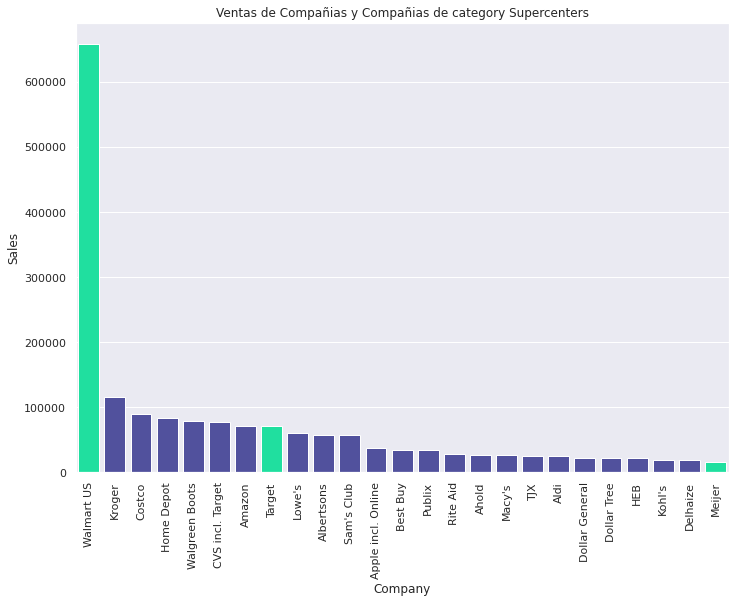

In [151]:
df_clean = df_clean.sort_values(by='Sales', ascending=False)
colors = [
    '#0FA' if value else "#44A" for value in df_clean['Category'] == 'Supercenters']

chart = sns.barplot(
    x=df_clean['Company'],
    y=df_clean['Sales'],
    palette=sns.color_palette(colors),
)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_title('Ventas de Compañias y Compañias de category Supercenters')


Text(0.5, 1.0, 'Ventas de Compañias y Compañias de category Grocery')

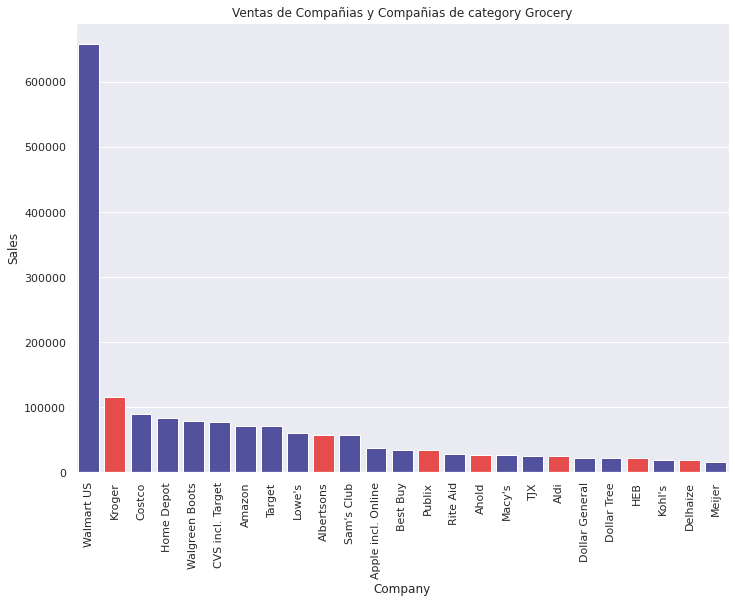

In [152]:
colors = ['#F33' if value else "#44A" for value in df_clean['Category'] == 'Grocery']

chart = sns.barplot(
    x=df_clean['Company'],
    y=df_clean['Sales'],
    palette=sns.color_palette(colors),
)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_title('Ventas de Compañias y Compañias de category Grocery')


Text(0.5, 1.0, 'Ventas de Compañias y Compañias de category Supercenters')

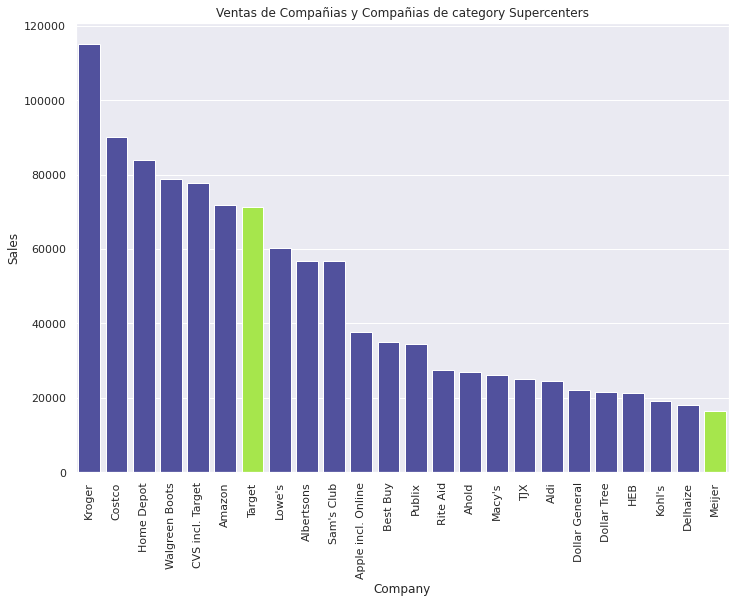

In [153]:
colors = [
    '#AF3' if value else "#44A" for value in df_most_sales['Category'] == 'Supercenters']

chart = sns.barplot(
    x=df_most_sales['Company'],
    y=df_most_sales['Sales'],
    palette=sns.color_palette(colors),
)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_title('Ventas de Compañias y Compañias de category Supercenters')


Text(0.5, 1.0, 'Ventas de Compañias y Compañias de category Grocery')

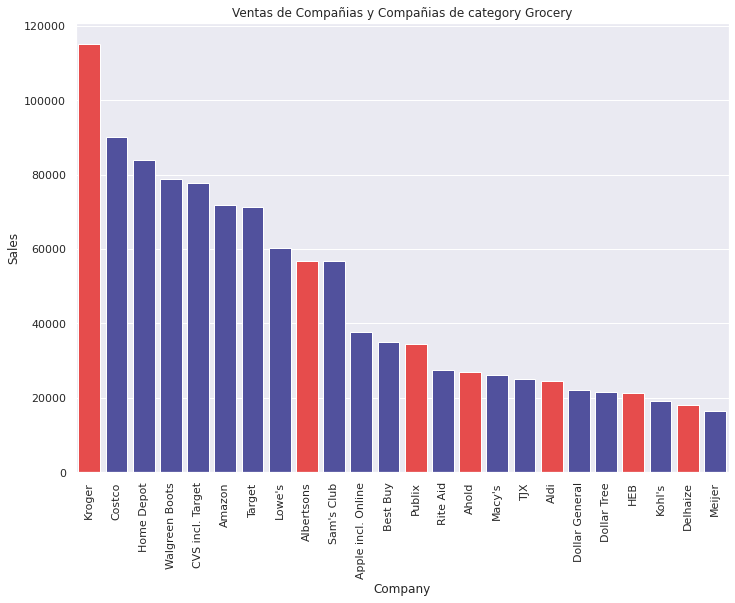

In [88]:
colors = ['#F33' if value else "#44A" for value in df_most_sales['Category'] == 'Grocery']

chart = sns.barplot(
    x=df_most_sales['Company'],
    y=df_most_sales['Sales'],
    palette=sns.color_palette(colors),
)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_title('Ventas de Compañias y Compañias de category Grocery')


#### Conclusiones
**10. Sin tomar en cuenta la compañia dominante en ventas,¿cual categoria genera mayor valor en ventas?, y de las compañias que conforman este grupo, ¿alguna se encuentra en el top de ventas ?**
Podemos observar en el analisis que sin tomar en cuenta **Walmart US** categoria con mayor valor en ventas es **'Grocery'** con un valor en ventas acumulado de $297.164,00 dolares, y teniendo a la compañia **Kroger** como la compañia con mayor valor en ventas de esta categoria, y solo es superada en ventas por **Walmart US**.

Del mismo modo vemos como la categoria **'Supercenters'** es levantada unicamente por **Walmart US**, con **Target** en el top 7 y **Meijer** en el ultimo lugar, por lo cual podemos decir que **Walmart US** es la unica compañia de la categoria de **Supercenters** que posee un alto crecimiento y alto valor en ventas.

### 11. Aquellas compañias con mas tiendas poseen un mejor valor de ventas por tienda (Sales/Avg. Store) ? y este valor tiene alguna relacion con la categoria de la compañia ?

In [154]:
df_clean = df_clean.sort_values(
  by=['Stores', 'Sales/Avg. Store'],
  ascending=False
)


Text(0.5, 1.0, 'Tendencia de Promedio de ventas por tienda vs cantidad de tiendas')

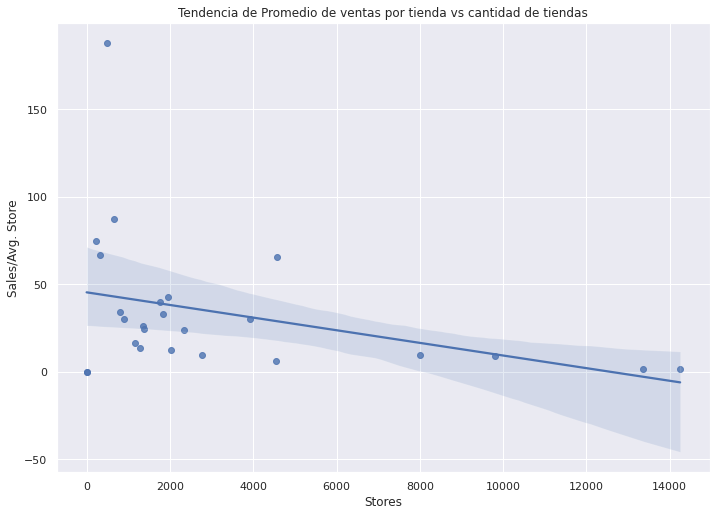

In [155]:
chart = sns.regplot(
  data=df_clean,
  y='Sales/Avg. Store',
  x='Stores',
)
chart.set_title('Tendencia de Promedio de ventas por tienda vs cantidad de tiendas')


In [156]:
# df_group_category = df_clean.groupby('Category')
df_group_category = df_most_sales.groupby('Category')


In [157]:
df_group_category['Sales/Avg. Store'].sum()


Category
Apparel                    9.369545
Department Stores         46.795602
Dollar Stores              3.332804
Drug Stores               24.662535
Electronic/Mail Order      0.000000
Electronics               24.685956
Grocery                  207.678590
Home Improvement          76.047670
Supercenters             114.720771
Warehouse Clubs          275.089015
Name: Sales/Avg. Store, dtype: float64

Text(0.5, 1.0, 'Promedio de ventas por tienda [Sales/Avg. Store] sin Wallmart')

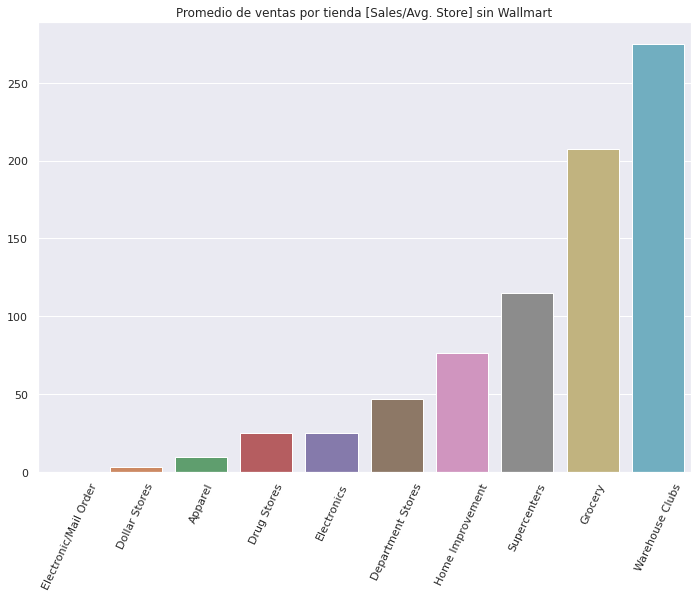

In [170]:
df_group_category = df_most_sales.groupby('Category')
# la suma de todas las ventas por categoria
chart_data = df_group_category['Sales/Avg. Store'].sum()
chart_data
dict_data = dict(chart_data)
# ordenamos el diccionario para poder graficarlo mejor
dict_data = {k: v for k, v in sorted(
    dict_data.items(), key=lambda item: item[1])}

chart = sns.barplot(
    x=list(dict_data.keys()),
    y=list(dict_data.values()),
)

for item in chart.get_xticklabels():
    item.set_rotation(65)
chart.set_title(
    'Promedio de ventas por tienda [Sales/Avg. Store] sin Wallmart')


Text(0.5, 1.0, 'Promedio de ventas por tienda agrupado por categoria de toda la data')

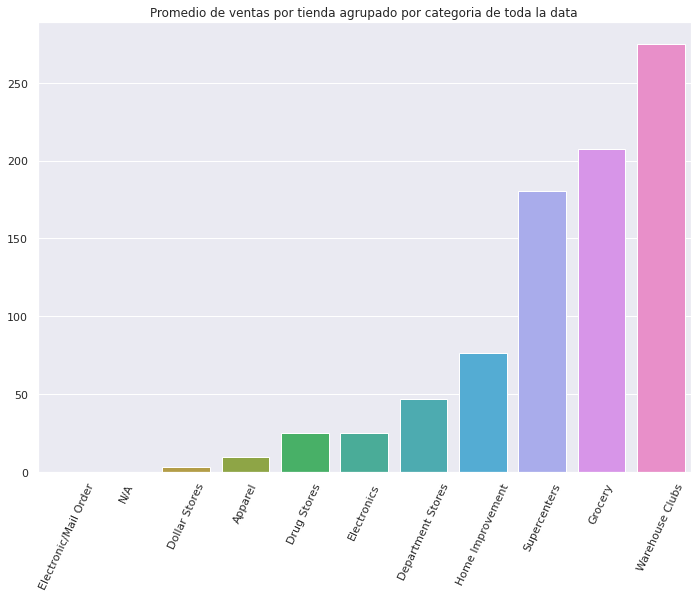

In [169]:
df_group_category = df_clean.groupby('Category')
# la suma de todas las ventas por categoria
chart_data = df_group_category['Sales/Avg. Store'].sum()
chart_data
dict_data = dict(chart_data)
# ordenamos el diccionario para poder graficarlo mejor
dict_data = {k: v for k, v in sorted(
    dict_data.items(), key=lambda item: item[1])}

chart = sns.barplot(
    x=list(dict_data.keys()),
    y=list(dict_data.values()),
)

for item in chart.get_xticklabels():
    item.set_rotation(65)
chart.set_title(
    'Promedio de ventas por tienda agrupado por categoria de toda la data')


Text(0.5, 1.0, 'Ventas por categoria sin Wallmart')

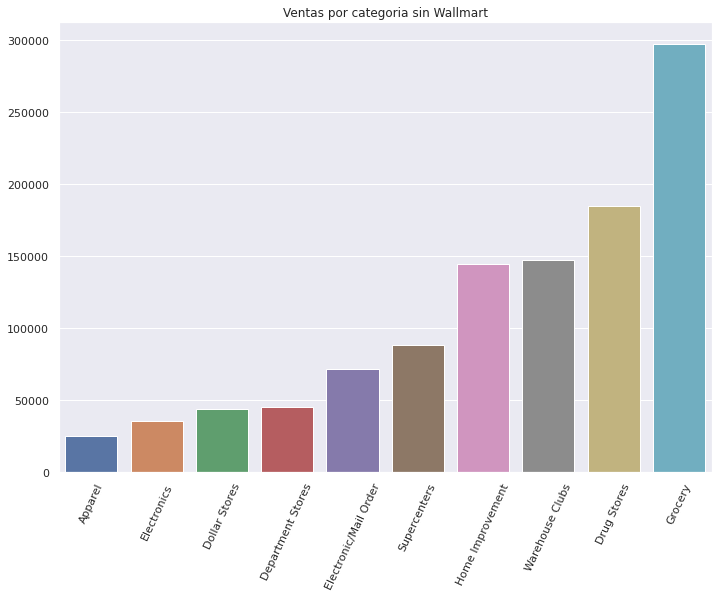

In [179]:
df_group_category = df_most_sales.groupby('Category')
# la suma de todas las ventas por categoria
chart_data = df_group_category['Sales'].sum()
chart_data
dict_data = dict(chart_data)
# ordenamos el diccionario para poder graficarlo mejor
dict_data = {k: v for k, v in sorted(
    dict_data.items(), key=lambda item: item[1])}

chart = sns.barplot(
    x=list(dict_data.keys()),
    y=list(dict_data.values()),
)

for item in chart.get_xticklabels():
    item.set_rotation(65)
chart.set_title(
    'Ventas por categoria sin Wallmart')


In [180]:
dict_data


{'Apparel': 25012,
 'Electronics': 34980,
 'Dollar Stores': 43698,
 'Department Stores': 45088,
 'Electronic/Mail Order': 71687,
 'Supercenters': 87800,
 'Home Improvement': 144287,
 'Warehouse Clubs': 146876,
 'Drug Stores': 184202,
 'Grocery': 297164}

Text(0.5, 1.0, 'Ventas Promedio por tienda de Compañias y Compañias de category Warehouse Clubs')

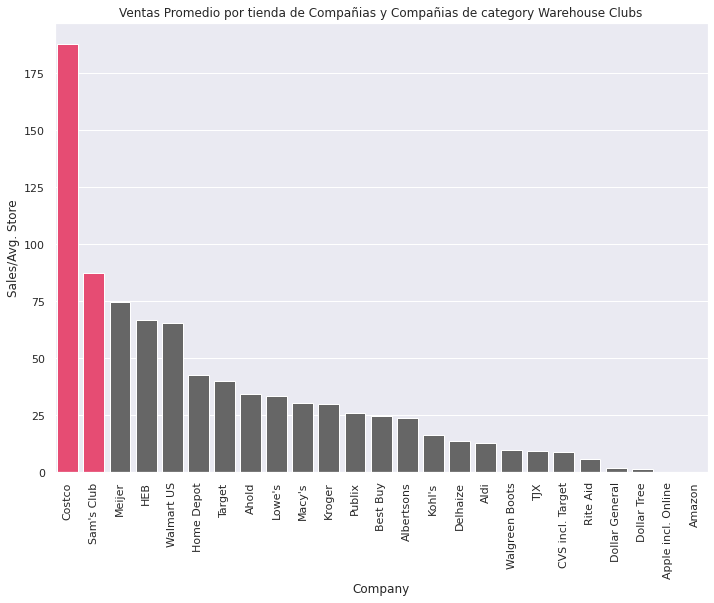

In [176]:
df_clean = df_clean.sort_values(
    by='Sales/Avg. Store', ascending=False)
colors = [
    '#F36' if value else "#666" for value in df_clean['Category'] == 'Warehouse Clubs']

chart = sns.barplot(
    x=df_clean['Company'],
    y=df_clean['Sales/Avg. Store'],
    palette=sns.color_palette(colors),
)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_title('Ventas Promedio por tienda de Compañias y Compañias de category Warehouse Clubs')


Text(0.5, 1.0, 'Cantidad de tiendas por Compañias y Compañias de category Warehouse Clubs')

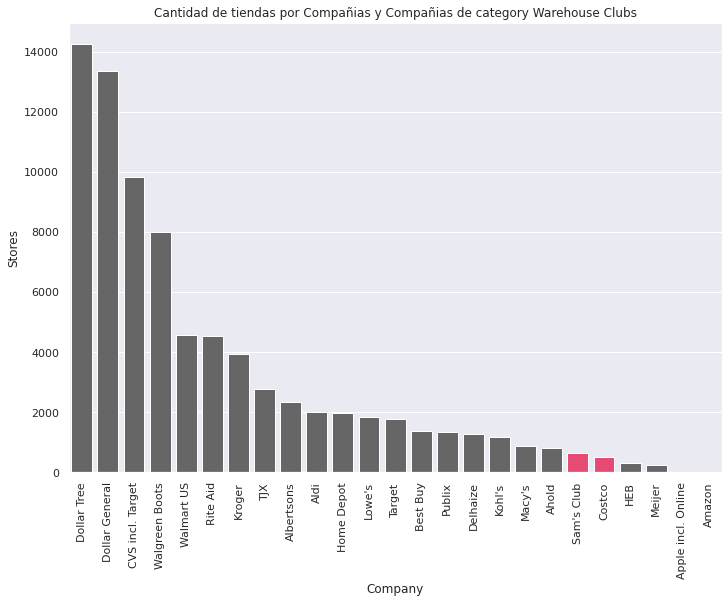

In [187]:
df_clean = df_clean.sort_values(
    by='Stores', ascending=False)
colors = [
    '#F36' if value else "#666" for value in df_clean['Category'] == 'Warehouse Clubs']

chart = sns.barplot(
    x=df_clean['Company'],
    y=df_clean['Stores'],
    palette=sns.color_palette(colors),
)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_title(
    'Cantidad de tiendas por Compañias y Compañias de category Warehouse Clubs')


Text(0.5, 1.0, 'cantidad de Ventas por Compañias y Compañias de category Warehouse Clubs')

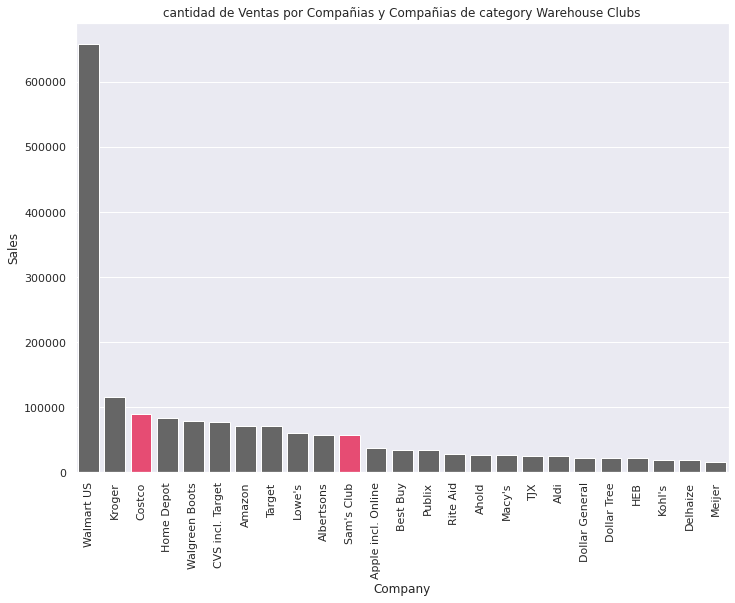

In [186]:
df_clean = df_clean.sort_values(
    by='Sales', ascending=False)
colors = [
    '#F36' if value else "#666" for value in df_clean['Category'] == 'Warehouse Clubs']

chart = sns.barplot(
    x=df_clean['Company'],
    y=df_clean['Sales'],
    palette=sns.color_palette(colors),
)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_title(
    'cantidad de Ventas por Compañias y Compañias de category Warehouse Clubs')


#### Conclusiones
**11 - Aquellas compañias con mas tiendas poseen un mejor valor de ventas por tienda (Sales/Avg. Store) ? y este valor tiene alguna relacion con la categoria de la compañia ?**

podemos ver tras este analisis resultados interesantes que en cuanto el promedio de ventas por Tienda ,tiende a reducirse mientras mas tiendas posee la compañia, esto puede ser debido a que se normaliza la data. Teniendo un promedio menor en ventas por tienda en cuanto mas tiendas se poseen.

Aun así la categoria de **Warehouse Clubs** sin considerar a **Wallmart Us** es la tercera categoria con mas ventas de toda la muestra con un valor en ventas de $146.876,00 dolares y **Warehouse Clubs** es la categoria con el mejor promedio en ventas por tienda de todo el dataset. formado por **Cotsco (Top 3) y Sam's Club(Top 11)** las cuales ambas poseen un valor significativo de ventas totales, teniendo asi un excelente promedio en ventas por tienda teniendo una cantidad de tiendas significativamente menor que la mayoria de las compañias.

### 12. Las compañias con un Store Count Growth positiva han aumentado en tiendas, ¿Que categoria ha tenido el mayor crecimiento y como ha sido su valor en ventas?, y como es el valor en ventas del top de compañias con mayor crecimiento en tiendas?

In [185]:
df_clean = df_clean.sort_values(
    by='Store Count Growth', ascending=False)
df_clean


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,has_stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores,True
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores,True
18,Aldi,24402,2021.0,12.715998,0.112273,Grocery,True
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters,True
16,Macy's,26028,889.0,30.442105,0.082826,Department Stores,True
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores,True
17,TJX,25012,2770.0,9.369545,0.078241,Apparel,True
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Clubs,True
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,True
13,Publix,34408,1351.0,25.997733,0.042438,Grocery,True


Text(0.5, 1.0, 'Store Count Growth positivo')

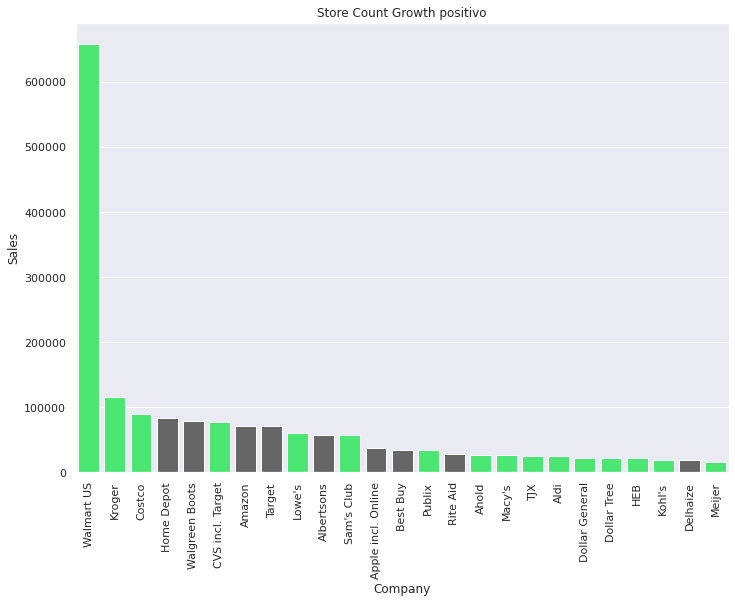

In [188]:
df_clean = df_clean.sort_values(
    by='Sales', ascending=False)
colors = [
    '#3F6' if value else "#666" for value in df_clean['Store Count Growth'] > 0]

chart = sns.barplot(
    x=df_clean['Company'],
    y=df_clean['Sales'],
    palette=sns.color_palette(colors),
)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_title(
    'Ventas con Store Count Growth positivo')


Text(0.5, 1.0, 'Ventas con Store Count Growth positivo sin wallmart')

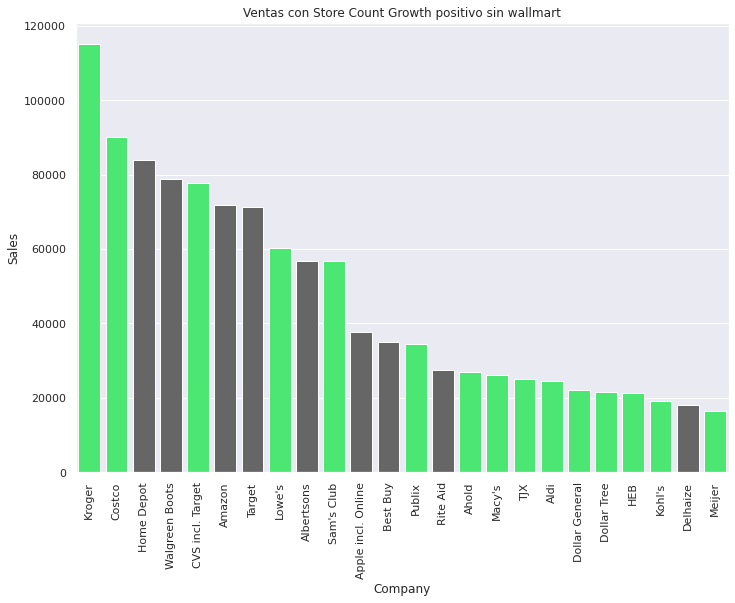

In [190]:
df_most_sales = df_most_sales.sort_values(
    by='Sales', ascending=False)
colors = [
    '#3F6' if value else "#666" for value in df_most_sales['Store Count Growth'] > 0]

chart = sns.barplot(
    x=df_most_sales['Company'],
    y=df_most_sales['Sales'],
    palette=sns.color_palette(colors),
)
for item in chart.get_xticklabels():
    item.set_rotation(90)
chart.set_title(
    'Ventas con Store Count Growth positivo sin wallmart')


Text(0.5, 1.0, 'Tendencia de Promedio de ventas por tienda vs cantidad de tiendas')

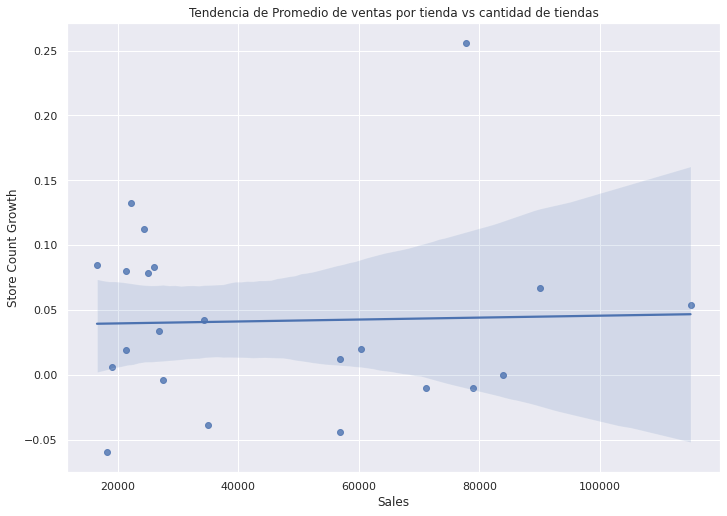

In [198]:
chart = sns.regplot(
    data=df_most_sales,
    y='Store Count Growth',
    x='Sales',
)
chart.set_title(
    'Tendencia de Promedio de ventas por tienda vs cantidad de tiendas')


<AxesSubplot:>

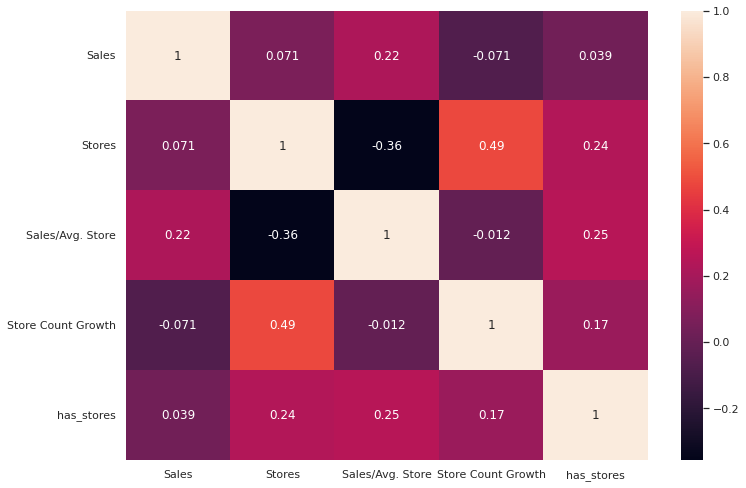

In [199]:
sns.heatmap(df_clean.corr(), annot=True)

#### Conclusiones
**12. Las compañias con un Store Count Growth positiva han aumentado en tiendas, ¿Que categoria ha tenido el mayor crecimiento y como ha sido su valor en ventas?, y como es el valor en ventas del top de compañias con mayor crecimiento en tiendas?**

Tras analizar la muestra de datos podemos concluir que no existe correlacion alguna entre el crecimiento en tiendas de una compañia con el valor en ventas de la misma, ya que la cantidad de tiendas que posee una compañia es una variable que no tiene una relacion directa con el valor de ventas de la misma.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=edc68bfa-8df4-47a4-8622-860ebb931fe9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>